In [1]:
# Importando os módulos

import numpy as np
import pandas as pd                 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import Functions as fn
%matplotlib inline       

In [2]:
dstrain = pd.read_csv("train.csv", names=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], sep=',', header=0)
# dstrain.head()

In [ ]:
#fn.plot(dstrain, 'Survived', 'Pclass')
fn.plot(dstrain, 'Survived', 'Pclass')

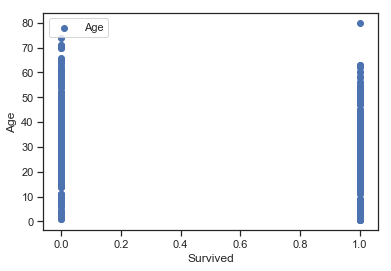

In [6]:
fn.scatter(dstrain, 'Survived', 'Age')